# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Read and Describe Data

In [2]:
# data sourced from kaggle
# https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data

df = pd.read_csv('./spotify_songs.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

| Field                    | Type      | Description                                                                                                                                                                                                                                                                                                                                                     |
|--------------------------|-----------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| track_id                 | character | Song unique ID                                                                                                                                                                                                                                                                                                                                                  |
| track_name               | character | Song name                                                                                                                                                                                                                                                                                                                                                       |
| track_artist             | character | Song artist                                                                                                                                                                                                                                                                                                                                                     |
| track_popularity         | double    | Song popularity (0-100) where higher is better                                                                                                                                                                                                                                                                                                                  |
| track_album_id           | character | Album unique ID                                                                                                                                                                                                                                                                                                                                                 |
| track_album_name         | character | Song album name                                                                                                                                                                                                                                                                                                                                                 |
| track_album_release_date | character | Date when album was released                                                                                                                                                                                                                                                                                                                                    |
| playlist_name            | character | Name of playlist                                                                                                                                                                                                                                                                                                                                                |
| playlist_id              | character | Playlist ID                                                                                                                                                                                                                                                                                                                                                     |
| playlist_genre           | character | Playlist genre                                                                                                                                                                                                                                                                                                                                                  |
| playlist_subgenre        | character | Playlist subgenre                                                                                                                                                                                                                                                                                                                                               |
| danceability             | double    | Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.                                                                                                                                 |
| energy                   | double    | Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.                                                                                                                                   |
| key                      | double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.                                                                                                                                                                         |
| loudness                 | double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.                                    |
| mode                     | double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.                                                                                                                                                                                                 |
| speechiness              | double    | Detects presence of spoken words. The more exclusively speech-like the recording (talk show, etc.), the closer to 1.0 the value. Values above 0.66 are probably made entirely of spoken words. Values between 0.33 and 0.66 may contain music and speech (sections or layered). Values below 0.33 most likely represent music and other non-speech-like tracks. |
| acousticness             | double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.                                                                                                                                                                                                                                    |
| instrumentalness         | double    | Predicts whether a track contains vocals. "Ooh" and "aah" treated as instrumental. Rap or spoken word are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.   |
| liveness                 | double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.                                                                                                                                         |
| valence                  | double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).                                                                                                               |
| tempo                    | double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.                                                                                                                                                                      |
| duration_ms              | double    | Duration of song in milliseconds                                                                                                                                                                                                                                                                                                                                |


# Feature Engineering and Selection

In [4]:
# creating a feature for the release year
# month and day are likely too granular to have an impact on popularity

df['track_album_release_date'] = pd.to_datetime(
    df['track_album_release_date'], format='mixed'
)

df['track_album_release_year'] = df['track_album_release_date'].dt.year

In [5]:
# choosing my features

categorical_features = ['track_name', 'track_artist', 'track_album_name']
numerical_features = [
    'track_album_release_year', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]
all_features = categorical_features + numerical_features

# splitting into features and target

X = df[numerical_features]
y = df['track_popularity']

X.describe().T

,count,mean,std,min,25%,50%,75%,max
track_album_release_year,32833.0,2011.137270,11.417451,1957.000000,2008.0000,2016.000000,2019.00000,2020.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


In [6]:
# converting non-float64 to float64 for feature scaling
X = X.astype({
    'track_album_release_year': 'float64',
    'key': 'float64',
    'mode': 'float64',
    'duration_ms': 'float64'
})

X.dtypes

track_album_release_year    float64
danceability                float64
energy                      float64
key                         float64
loudness                    float64
mode                        float64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                 float64
dtype: object

# Feature Scaling

In [7]:
scaler = MinMaxScaler()

# scaling to [0, 1] because MSE loss function in LR is sensitive to outliers

X.loc[:, ['track_album_release_year', 'key', 'loudness', 'tempo', 'duration_ms']] = scaler.fit_transform(
    X[['track_album_release_year', 'key', 'loudness', 'tempo', 'duration_ms']]
)

y = y / 100

X.describe().T

,count,mean,std,min,25%,50%,75%,max
track_album_release_year,32833.0,0.859322,0.181229,0.000000,0.809524,0.936508,0.984127,1.000
danceability,32833.0,0.654850,0.145085,0.000000,0.563000,0.672000,0.761000,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.581000,0.721000,0.840000,1.000
key,32833.0,0.488588,0.328332,0.000000,0.181818,0.545455,0.818182,1.000
loudness,32833.0,0.832481,0.062620,0.000000,0.802066,0.844079,0.875951,1.000
mode,32833.0,0.565711,0.495671,0.000000,0.000000,1.000000,1.000000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.041000,0.062500,0.132000,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.015100,0.080400,0.255000,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.000000,0.000016,0.004830,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.092700,0.127000,0.248000,0.996


# Visualize Distributions

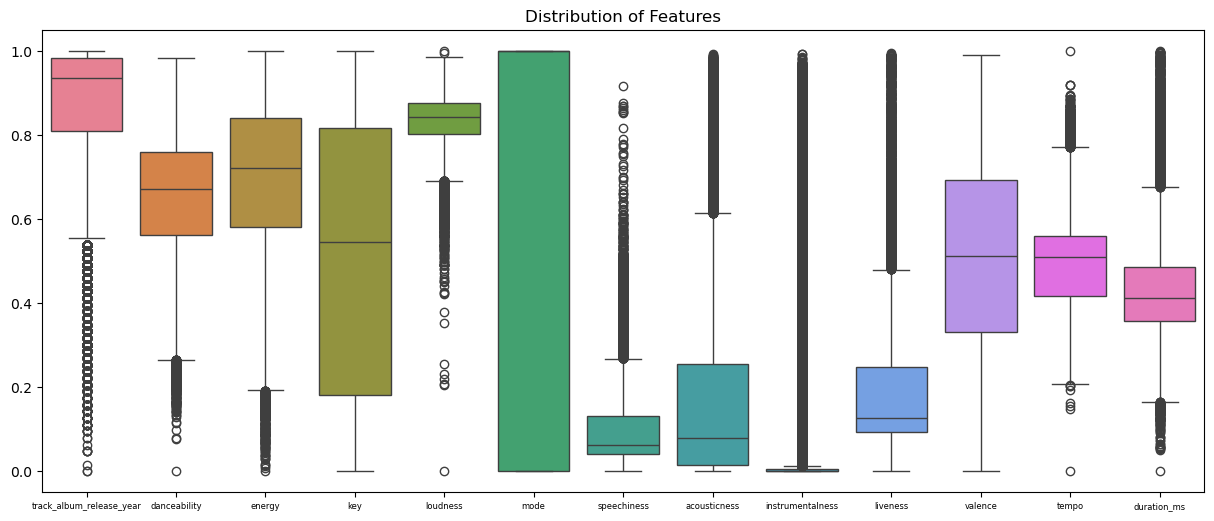

In [8]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=X)
plt.title('Distribution of Features')
plt.xticks(fontsize=6)
plt.show()

# Train/Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [10]:
pd.concat([X_train, y_train], axis=1)

,track_album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity
12593,0.206349,0.415,0.658,0.363636,0.720764,0.0,0.0696,0.000045,0.000735,0.1760,0.450,0.680818,0.319974,0.68
791,0.603175,0.655,0.884,0.545455,0.836766,0.0,0.0602,0.010200,0.000000,0.2590,0.772,0.584731,0.418910,0.01
25523,0.730159,0.847,0.696,0.454545,0.845190,0.0,0.0642,0.052000,0.004020,0.0795,0.763,0.587529,0.348870,0.33
31510,0.873016,0.596,0.910,0.818182,0.848878,0.0,0.0385,0.000629,0.001370,0.1780,0.484,0.534426,0.347329,0.00
10241,0.984127,0.877,0.665,0.090909,0.845127,1.0,0.0538,0.406000,0.000035,0.2320,0.143,0.509539,0.379670,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0.984127,0.714,0.818,0.000000,0.914025,1.0,0.0312,0.315000,0.000000,0.4410,0.521,0.417416,0.323855,0.30
6265,0.984127,0.815,0.624,0.545455,0.845546,0.0,0.4490,0.389000,0.000000,0.0724,0.561,0.583595,0.342835,0.57
11284,0.809524,0.402,0.502,0.181818,0.763552,0.0,0.0315,0.070200,0.000064,0.1150,0.209,0.616100,0.720474,0.49
860,0.968254,0.589,0.592,0.636364,0.808017,0.0,0.0334,0.005980,0.000000,0.0614,0.348,0.589421,0.408172,0.31


# Linear Regression

In [11]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R^2:', r2)
print('MSE:', mse)

R^2: 0.0708872650882445
MSE: 0.05769145038683935
